# First try with $b_{b,nw}$

In [14]:
# imports
from importlib import reload

import seaborn as sns
from matplotlib import pyplot as plt

from ocpy.hydrolight import loisel23
from ocpy.utils import plotting

from bing import rt

from xqaa import geometric as xqaa_geom
from xqaa import params as xqaa_params
from xqaa import inversion

In [2]:
%matplotlib ipympl

# Load up Loisel+2023

In [3]:
l23_ds = loisel23.load_ds(1,0)

## Unpack

In [4]:
l23_wave = l23_ds.Lambda.data
l23_Rrs = l23_ds.Rrs.data
l23_bbnw = l23_ds.bbnw.data

# Water

## Use Loisel+2023 (to be consistent)

In [5]:
aw = (l23_ds.a.data - l23_ds.anw.data)[0]
aw.shape

(81,)

In [6]:
bbw = (l23_ds.bb.data - l23_ds.bbnw.data)[0]

# Try one

In [7]:
idx = 170

In [8]:
Rrs = l23_Rrs[idx]
bbnw_true = l23_bbnw[idx]

## $r_{\rm rs}$

In [9]:
rrs = xqaa_geom.rrs_from_Rrs(Rrs)

## Plot

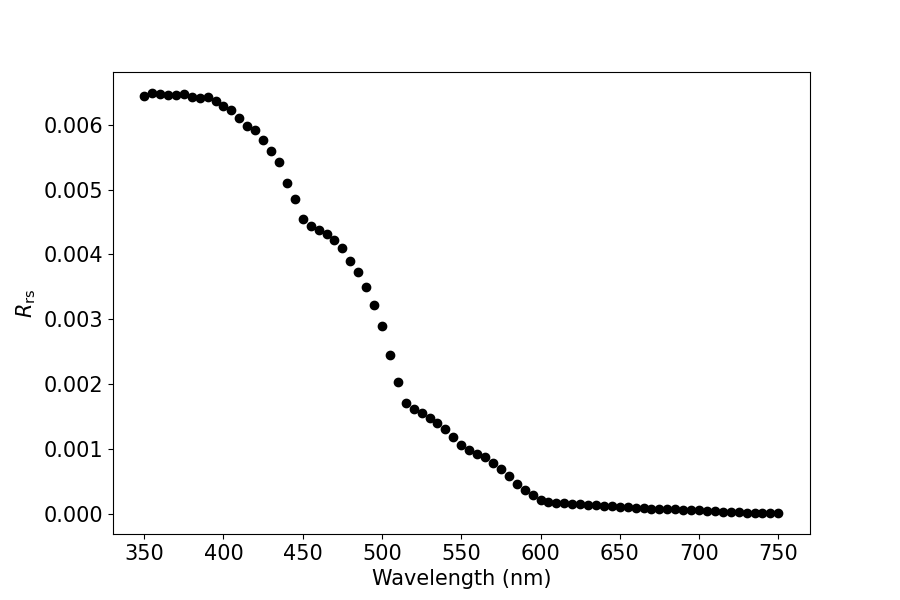

In [10]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, Rrs, 'ko')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$R_{\rm rs}$')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

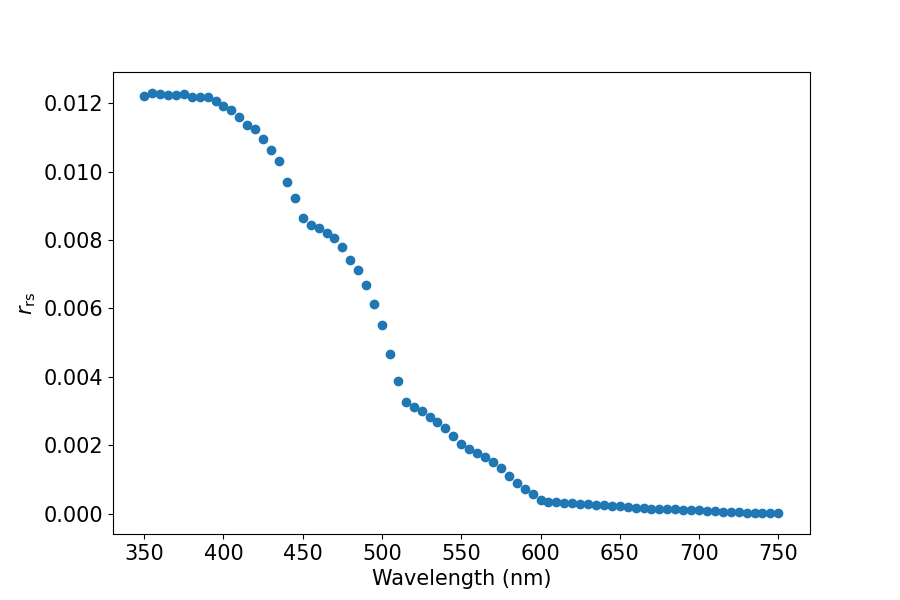

In [12]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, rrs, 'o')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$r_{\rm rs}$')
#
plotting.set_fontsize(ax, 15)
#
plt.savefig('fig_rrs.png', dpi=300)
plt.show()

## Gordon Coefficients 

In [17]:
reload(inversion)
dataset = 'loisel23'
extras = dict(X=1, Y=0)
xqaaParams = xqaa_params.XQAAParams()
xqaaParams.L23_X = extras['X']
xqaaParams.L23_Y = extras['Y']
G1, G2 = inversion.calc_Gcoeff(l23_wave, xqaaParams)

## $D$

In [18]:
D = inversion.quadratic(rrs, G1, G2)

### Plot

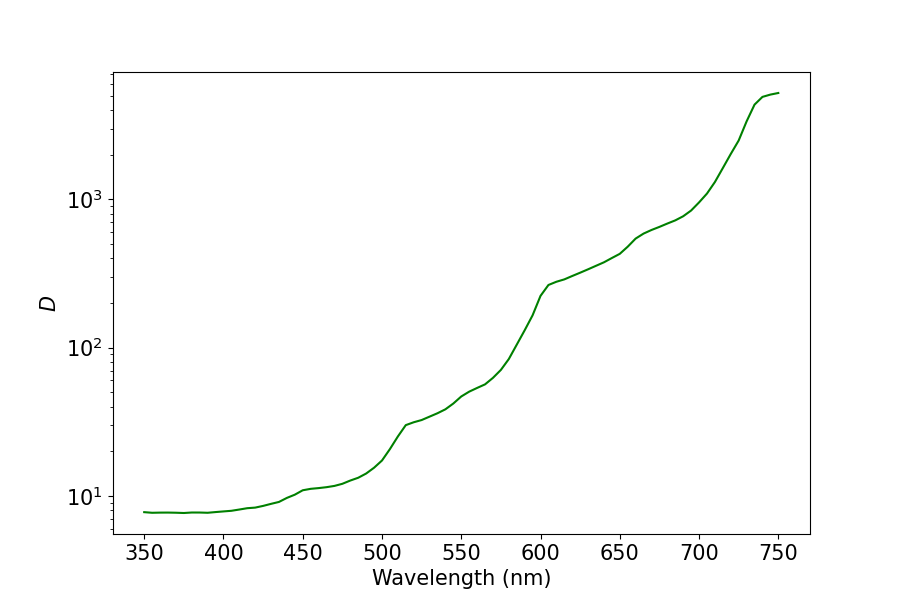

In [19]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, D, 'g')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$D$')
#
ax.set_yscale('log')
#
plotting.set_fontsize(ax, 15)
#
plt.show()

## Invert

In [20]:
reload(inversion)
bbnw = inversion.retrieve_bbnw(aw, bbw, D)

### Here we go...

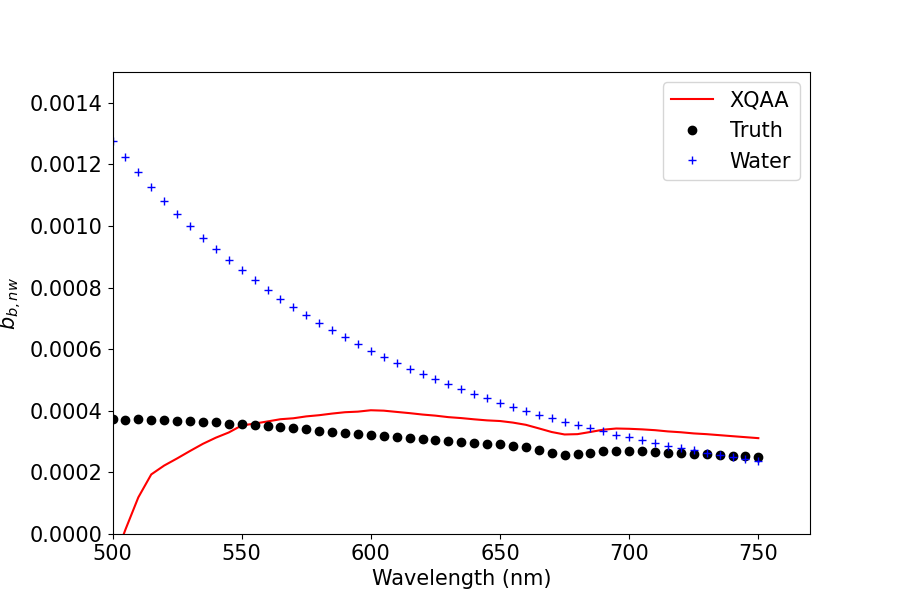

In [23]:
scl = 1.
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, bbnw/scl, 'r-', label='XQAA')
ax.plot(l23_wave, l23_bbnw[idx], 'ko', label='Truth')
ax.plot(l23_wave, bbw, 'b+', label='Water')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$b_{b,nw}$')
#
#ax.set_yscale('log')
ax.set_ylim(0., 0.0015)
ax.set_xlim(500., None)
#
plotting.set_fontsize(ax, 15)
ax.legend(fontsize=15.)
#
plt.savefig('fig_bbnw.png', dpi=300)
plt.show()

----

# Internal test

In [18]:
Rrs = rt.calc_Rrs(l23_ds.a.data[idx], l23_ds.bb.data[idx])

In [19]:
rrs = xiop_geom.rrs_from_Rrs(Rrs)

In [20]:
reload(inversion)
D = inversion.quadratic(rrs, rt.G1, rt.G2)

In [21]:
bbnw = inversion.retrieve_bbnw(aw, bbw, D)

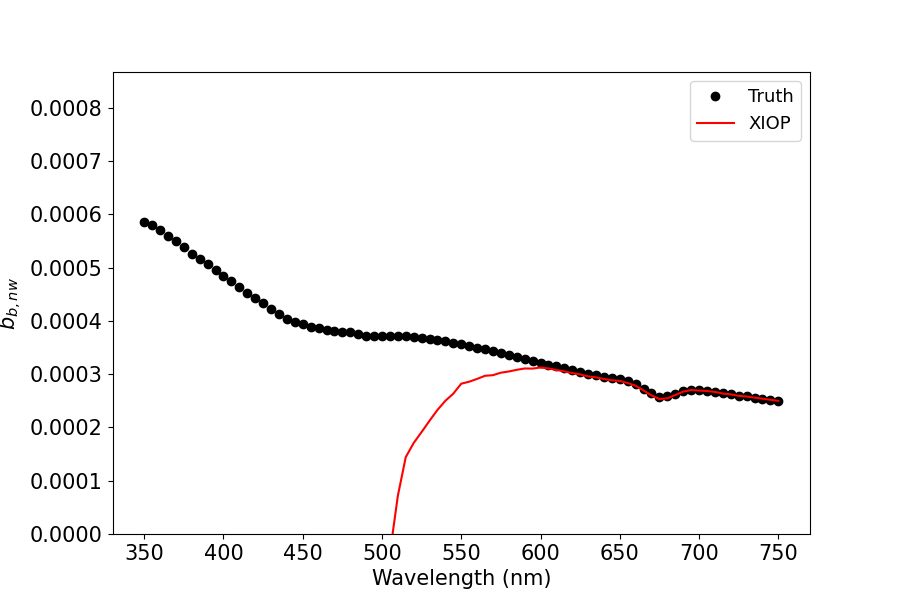

In [22]:
fig = plt.figure(figsize=(9,6))
ax = plt.gca()
ax.plot(l23_wave, l23_bbnw[idx], 'ko', label='Truth')
ax.plot(l23_wave, bbnw, 'r-', label='XIOP')
#
ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel(r'$b_{b,nw}$')
ax.legend(fontsize=13.)
#
#ax.set_yscale('log')
ax.set_ylim(0., None)
#
plotting.set_fontsize(ax, 15)
#
plt.show()